# Tesla stocks prediction from Automotive and Energy Company

In [1]:
!pwd

/Users/aelinadas/Anaconda-Data Science-Jupyter/Jupyter Notebook/02_001050895_AelinaDas


In [2]:
# Better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

In [3]:
# From pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 1, 30)
bac = web.DataReader('TSLA', 'yahoo', start, end)
bac.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000
2016-01-11,214.449997,203.000000,214.009995,207.850006,4091400,207.850006
2016-01-12,213.740005,205.309998,211.600006,209.970001,3091900,209.970001
2016-01-13,212.649994,200.000000,212.009995,200.309998,4126400,200.309998
2016-01-14,210.000000,193.380005,202.210007,206.179993,6490700,206.179993


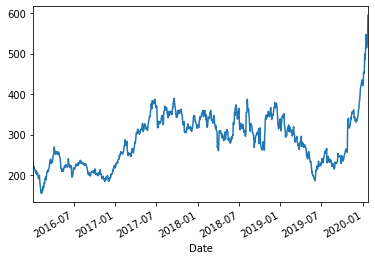

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = bac['High']
vol.plot()

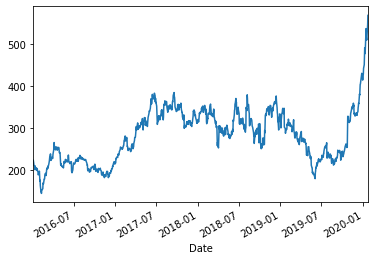

In [5]:
close = bac['Close']
close.plot()

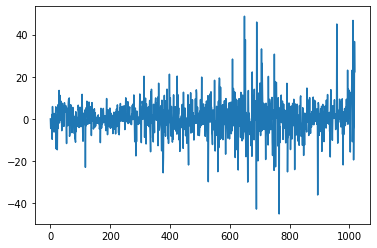

In [6]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

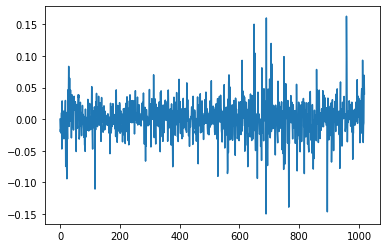

In [7]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [8]:
vol.corr(close)

0.9977679658352654

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

tsla = pd.read_csv('data/TSLA.csv', index_col=['Date'], parse_dates=['Date'])
tsla.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


In [11]:
drop_cols = ['Adj Close','Volume']
tsla.drop(drop_cols, axis=1, inplace=True)

In [12]:
tsla.head()

,Open,High,Low,Close
Date,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001


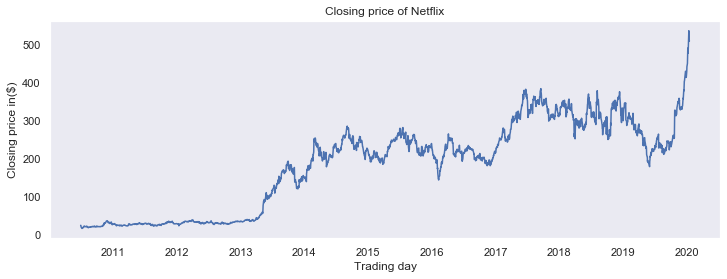

In [13]:
# Plot closing price

plt.figure(figsize=(12, 4))
plt.plot(tsla.Close)
plt.title('Closing price of Netflix')
plt.ylabel('Closing price in($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

## Moving Average

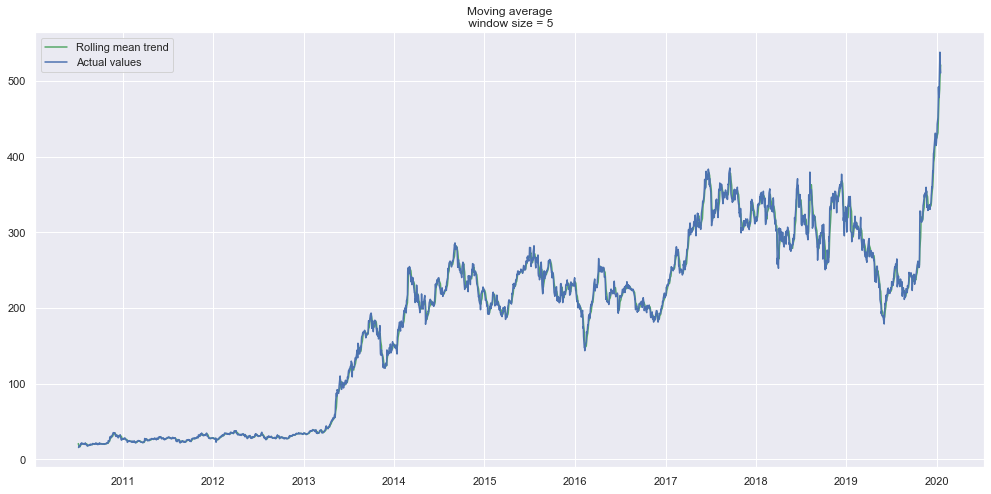

In [14]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(tsla.Close, 5)

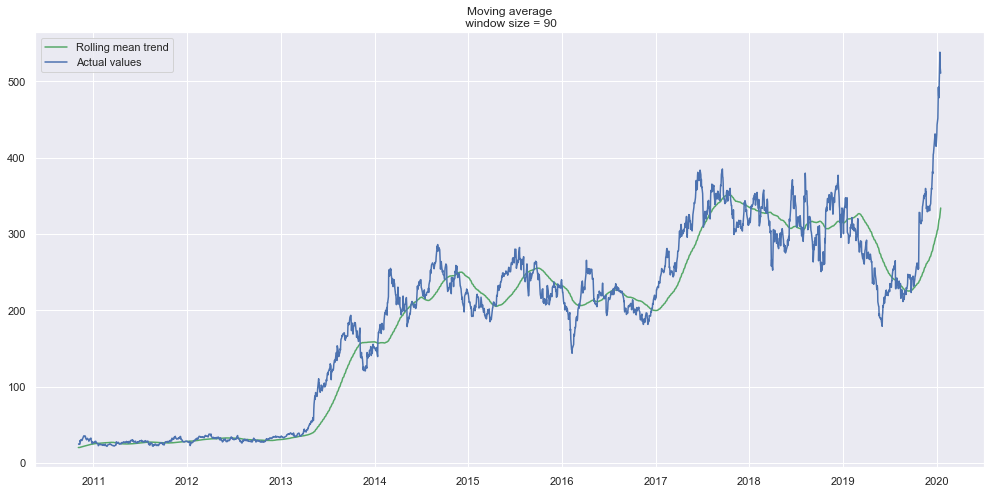

In [15]:
#Smooth by previous quarter (90 days)
plot_moving_average(tsla.Close, 90)

## Exponential smoothing

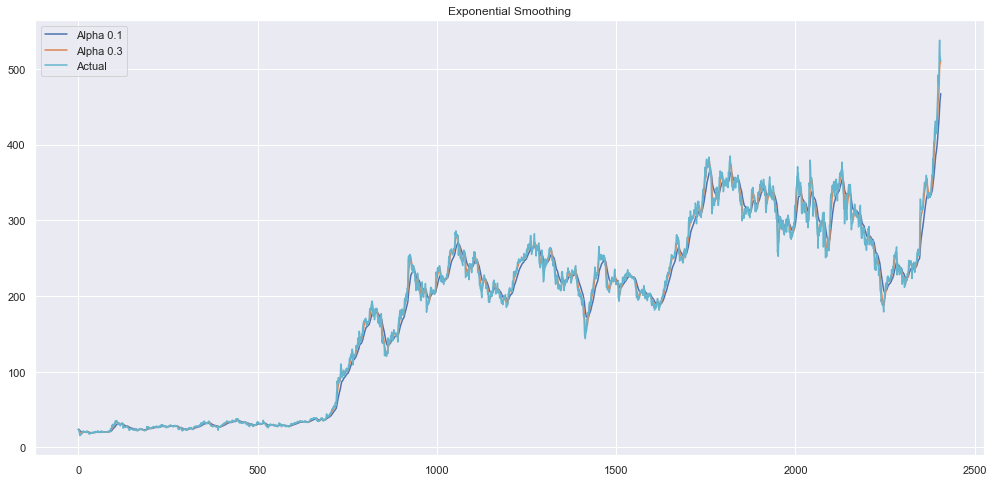

In [16]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(tsla.Close, [0.1, 0.3])

## Double Exponential

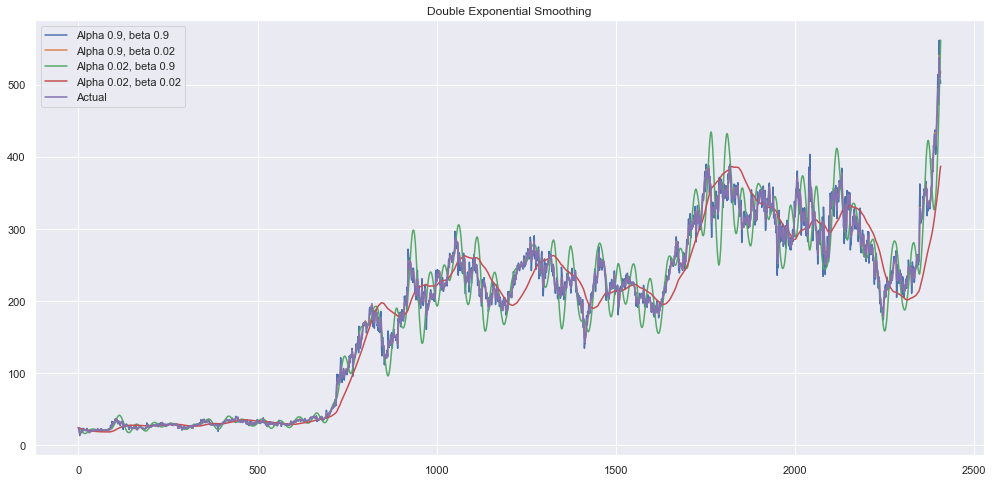

In [17]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(tsla.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

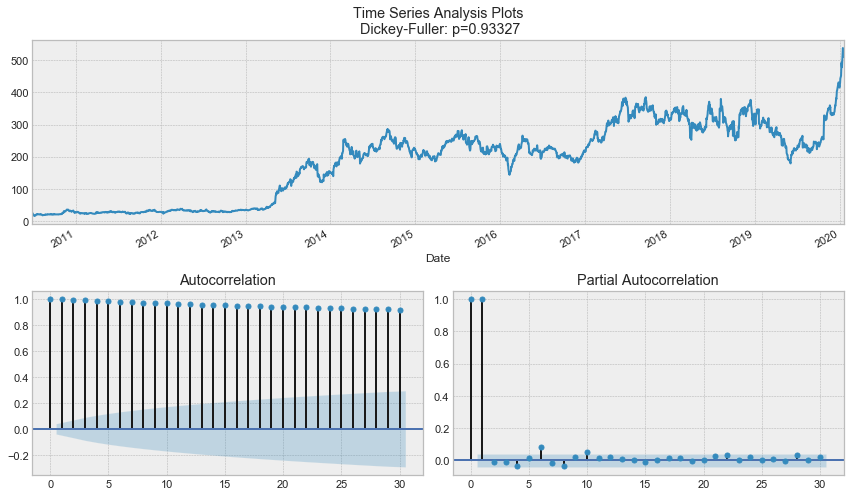

In [18]:
import statsmodels.api as sm
import statsmodels as smt
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(tsla.Close, lags=30)

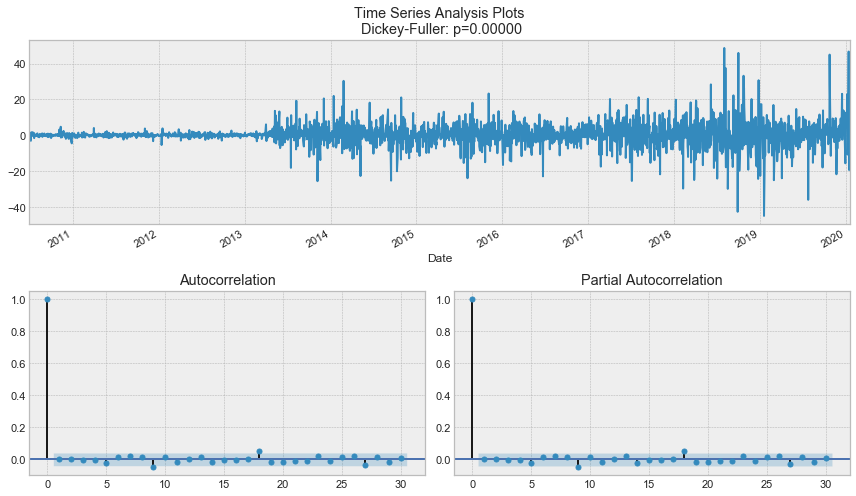

In [19]:
# Take the first difference to remove to make the process stationary
tsla_diff = tsla.Close - tsla.Close.shift(1)

tsplot(tsla_diff[1:], lags=30)

## Stocks prediction using Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
pd.concat([tsla.Close, tsla.Close.shift(-1)], axis=1)

,Close,Close
Date,,
2010-06-29,23.889999,23.830000
2010-06-30,23.830000,21.959999
2010-07-01,21.959999,19.200001
2010-07-02,19.200001,16.110001
2010-07-06,16.110001,15.800000
...,...,...
2020-01-13,524.859985,537.919983
2020-01-14,537.919983,518.500000
2020-01-15,518.500000,513.489990


In [22]:
tsla.head()

,Open,High,Low,Close
Date,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001


In [23]:
tsla.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [25]:
# Need to remove NA
tsla = tsla.dropna()
# Regression - Try to predict closing value of stocks (y) from remaining columns (X)
X = tsla[[x for x in tsla.columns]].iloc[:-1]
# Get training set (X_train)
y = tsla.Close.shift(-1).dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Accuracy of our model

In [27]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.9959705294565704

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
type(y_pred)

numpy.ndarray

In [30]:
y_pred[0:10]

array([292.9859923, 217.6729997, 228.1899978, 333.8560028, 203.5839996,
       263.0160065, 307.2729982, 223.6839998, 240.133    ,  27.6429999])

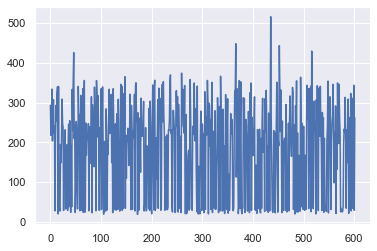

In [31]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

In [32]:
type(y_test)

pandas.core.series.Series

In [33]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [34]:
y_test2[0:10]

array([314.73999 , 220.5     , 233.389999, 334.869995, 205.820007,
       277.450012, 301.149994, 228.919998, 234.410004,  27.6     ])

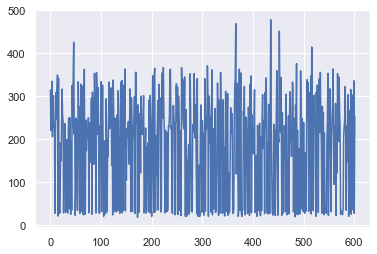

In [35]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

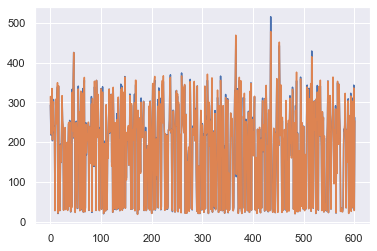

In [36]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

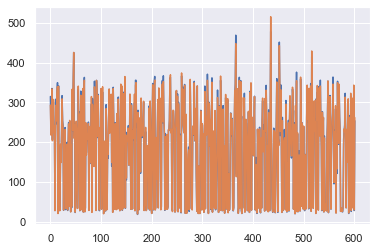

In [37]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [38]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,292.985992,314.739990
1,217.673000,220.500000
2,228.189998,233.389999
3,333.856003,334.869995
4,203.584000,205.820007
...,...,...
597,38.112000,38.980000
598,47.995000,47.830002
599,343.401999,336.220001
600,29.367000,27.709999


In [39]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Close', 0.6676334494064805),
 ('High', 0.3062962828162699),
 ('Low', 0.014804609580467315),
 ('Open', 0.01126565819678234)]